In [0]:
import torch

from torchvision import utils, models, datasets, transforms
from PIL import Image

import urllib.request as request
import matplotlib.pyplot as plt

# **Modelo pre-entrenado**

---

In [0]:
inception = models.inception_v3(pretrained=True) # Importamos el modelo

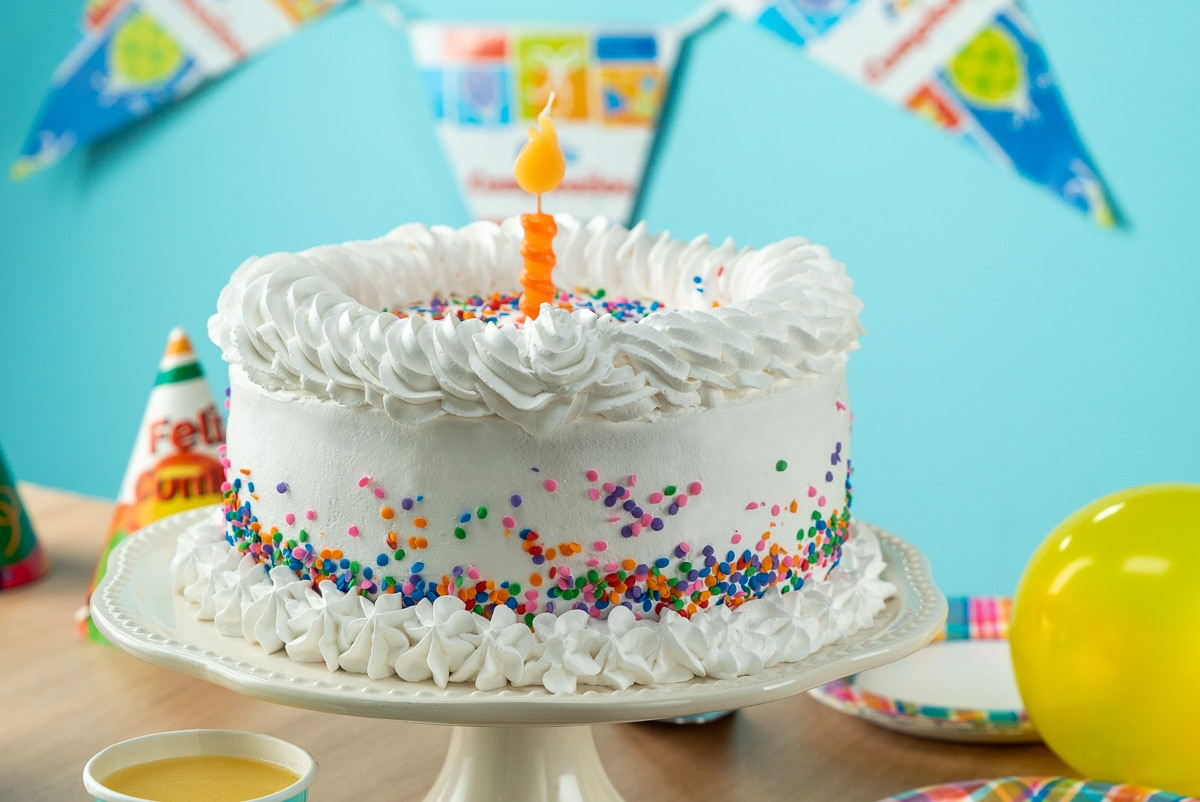

In [0]:
url = 'https://cdn.kiwilimon.com/recetaimagen/35112/40965.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

In [0]:
image

('test.jpg', <http.client.HTTPMessage at 0x7fe527098470>)

In [0]:
preprocess = transforms.Compose([
  transforms.Resize(128),
  transforms.CenterCrop(128),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


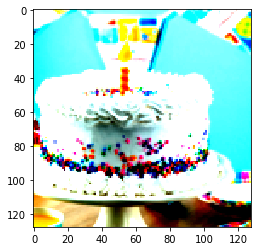

In [0]:
img_t = preprocess(img)
batch = torch.unsqueeze(img_t, 0)
plt.imshow(img_t.permute(1, 2, 0))

In [0]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [0]:
out = inception(batch)
out 

tensor([[-3.1697e+00,  2.5346e+00,  1.0895e+00, -4.9595e+00, -4.9049e+00,
         -5.2004e+00, -3.4383e+00, -6.3019e+00, -1.7583e+00, -4.8004e+00,
         -4.7859e+00,  2.7931e-01, -3.6434e+00,  7.4719e-01,  7.2575e-01,
         -1.9938e+00, -2.8506e+00,  3.4825e+00, -3.5000e-01,  2.2176e+00,
         -9.1427e-01, -4.6811e+00, -1.5622e+00, -4.9849e+00,  2.6024e+00,
          8.6168e-01, -1.9632e+00, -2.1508e+00, -3.3541e+00,  2.0726e+00,
          1.3484e+00, -5.5243e-01, -7.0704e-01, -3.4820e+00, -4.2433e+00,
         -4.8545e+00,  3.5708e+00,  1.2655e-01, -1.9041e+00,  7.3968e-01,
         -4.1465e-01, -4.3081e+00, -2.6004e+00, -2.6443e+00, -1.0698e+00,
         -5.9247e-01, -3.7487e-01,  2.7100e+00, -1.5723e+00, -3.7818e+00,
         -2.1564e+00, -1.0684e+00, -2.5979e+00,  5.7762e-01, -2.2417e+00,
         -2.2834e-01, -3.0121e+00,  4.2343e+00, -2.3803e+00, -7.8109e+00,
         -8.8285e-01, -4.8460e-01, -8.8335e-03,  2.0501e+00,  5.4222e-02,
         -9.8726e-02, -2.3850e+00,  2.

In [0]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [0]:
_, index = torch.max(out, 1)

In [0]:
index

tensor([470])

In [0]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100 
labels[index[0]], percentage[index[0]].item()

('candle, taper, wax light', 99.99995422363281)

# **Trabajando con un dataset**
---

In [0]:
# Traer el dataset
data_path = 'data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
dataset_validation = datasets.CIFAR10(data_path, train=False, download=True)

0it [00:00, ?it/s]

 98%|█████████▊| 167583744/170498071 [00:12<00:00, 16645300.02it/s]

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [0]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

In [0]:
len(dataset)

50000

In [0]:
img, index = dataset[1234]
img, index, classes[index]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FE5272DAF98>, 0, 'plane')

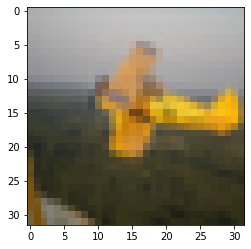

In [0]:
plt.imshow(img)

In [0]:
tensor_tranform = transforms.ToTensor() # Transformador a tensor

img_tensor = tensor_tranform(img)

img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FE5272DAF98>,
 tensor([[[0.6667, 0.6745, 0.6824,  ..., 0.7059, 0.6980, 0.6902],
          [0.6784, 0.6824, 0.6902,  ..., 0.7216, 0.7137, 0.7098],
          [0.6667, 0.6706, 0.6784,  ..., 0.7176, 0.7137, 0.7059],
          ...,
          [0.4745, 0.4627, 0.5020,  ..., 0.2039, 0.2078, 0.2000],
          [0.4667, 0.4627, 0.4745,  ..., 0.1608, 0.1922, 0.1882],
          [0.4471, 0.4627, 0.4549,  ..., 0.1020, 0.1529, 0.1882]],
 
         [[0.6784, 0.6824, 0.6941,  ..., 0.7216, 0.7176, 0.7098],
          [0.6824, 0.6863, 0.6941,  ..., 0.7333, 0.7255, 0.7216],
          [0.6667, 0.6706, 0.6784,  ..., 0.7216, 0.7176, 0.7098],
          ...,
          [0.3412, 0.3255, 0.4706,  ..., 0.1922, 0.1922, 0.1804],
          [0.3608, 0.3059, 0.4275,  ..., 0.1608, 0.1843, 0.1804],
          [0.3804, 0.3020, 0.3725,  ..., 0.1176, 0.1529, 0.1765]],
 
         [[0.6863, 0.6902, 0.6980,  ..., 0.7333, 0.7294, 0.7216],
          [0.6863, 0.6902, 0.6941,  ..., 0

In [0]:
# De nuevo el dataset pero con una previa transformacion
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())
img, label = dataset[1234]
img, label

Files already downloaded and verified


(tensor([[[0.6667, 0.6745, 0.6824,  ..., 0.7059, 0.6980, 0.6902],
          [0.6784, 0.6824, 0.6902,  ..., 0.7216, 0.7137, 0.7098],
          [0.6667, 0.6706, 0.6784,  ..., 0.7176, 0.7137, 0.7059],
          ...,
          [0.4745, 0.4627, 0.5020,  ..., 0.2039, 0.2078, 0.2000],
          [0.4667, 0.4627, 0.4745,  ..., 0.1608, 0.1922, 0.1882],
          [0.4471, 0.4627, 0.4549,  ..., 0.1020, 0.1529, 0.1882]],
 
         [[0.6784, 0.6824, 0.6941,  ..., 0.7216, 0.7176, 0.7098],
          [0.6824, 0.6863, 0.6941,  ..., 0.7333, 0.7255, 0.7216],
          [0.6667, 0.6706, 0.6784,  ..., 0.7216, 0.7176, 0.7098],
          ...,
          [0.3412, 0.3255, 0.4706,  ..., 0.1922, 0.1922, 0.1804],
          [0.3608, 0.3059, 0.4275,  ..., 0.1608, 0.1843, 0.1804],
          [0.3804, 0.3020, 0.3725,  ..., 0.1176, 0.1529, 0.1765]],
 
         [[0.6863, 0.6902, 0.6980,  ..., 0.7333, 0.7294, 0.7216],
          [0.6863, 0.6902, 0.6941,  ..., 0.7373, 0.7333, 0.7255],
          [0.6667, 0.6706, 0.6784,  ...,

In [0]:
img.min(), img.max() # Minimo y maximo del tensor

(tensor(0.0235), tensor(0.9843))

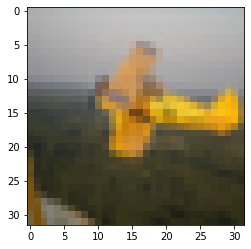

In [0]:
plt.imshow(img.permute(1, 2, 0))

In [0]:
# Lista de tensores
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3) 

In [0]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [0]:
print(imgs.view(3, -1).mean(dim=1))
print(imgs.view(3, -1).std(dim=1))

tensor([0.4915, 0.4823, 0.4468])
tensor([0.2470, 0.2435, 0.2616])


In [0]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.2470, 0.2435, 0.2616))
])

In [0]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)


Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'horse'

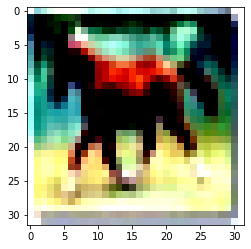

In [0]:
img, label = dataset[23456]
plt.imshow(img.permute(1, 2, 0))
classes[label]